# Classic NLP — Statistical Pipeline (SMS Spam Detection)

This notebook demonstrates **inference and evaluation only**  
for a trained **classic NLP model** (TF-IDF + Linear SVM).

The full training pipeline (data loading, preprocessing, training, tuning)
is implemented and executed via Python scripts under `src/`.


> ⚠️ **Note**
>
> Model training, validation, and hyperparameter tuning were executed via
> Python scripts (`src/stage4_model_baseline.py` → `src/stage7_improve_regularization.py`).
>
> This notebook is intended for:
> - Demonstration
> - Inspection
> - Sanity checks
> - Lightweight analysis
>
> **Not for training or experimentation.**



## Project Summary

- **Task:** Binary text classification (Spam vs Ham)
- **Dataset:** SMS Spam Collection
- **Approach:** Classic NLP (Bag-of-Words)
- **Feature Engineering:** TF-IDF
- **Models:**
  - Baseline: Multinomial Naive Bayes
  - Final: Linear SVM (LinearSVC)
- **Evaluation Metrics:**
  - Accuracy
  - Precision
  - Recall
  - F1-Score
- **Output Artifacts:**
  - Confusion Matrix
  - Classification Report
  - Final Metrics (JSON)


## Pipeline Overview

The full pipeline consists of the following stages:

1. Data loading & normalization  
2. Quick EDA (dataset statistics)  
3. Text preprocessing  
4. Baseline model (TF-IDF + Naive Bayes)  
5. Improved model (TF-IDF + Linear SVM)  
6. Evaluation on held-out test set  
7. Regularization & n-gram tuning  
8. Inference examples  
9. Final report generation  

✔️ All stages were executed end-to-end via scripts.  
✔️ This notebook focuses on **results, not process**.


In [8]:
from pathlib import Path
import json
import joblib
import pandas as pd


In [9]:
import matplotlib.pyplot as plt

# Evaluation metrics 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)



## Load Trained Artifacts

We load:
- The processed **test set**
- The **final trained model** (improved version if available)

All artifacts were generated by the pipeline scripts.


In [10]:
PROJECT = Path("..").resolve()  # notebooks/ -> project root

DATA_DIR = PROJECT / "data" / "processed"
MODELS_DIR = PROJECT / "outputs" / "models"

test_path = DATA_DIR / "test.csv"

# Prefer improved model if exists
model_path = MODELS_DIR / "improved_tfidf_linearsvc.joblib"
if not model_path.exists():
    model_path = MODELS_DIR / "best_tfidf_linearsvc.joblib"

print("Test set:", test_path)
print("Model:", model_path)

# Load test data and model
test_df = pd.read_csv(test_path)
model = joblib.load(model_path)

test_df.head()


Test set: C:\Users\ORENS\module2-deep-learning-nlp\02_classic_nlp\data\processed\test.csv
Model: C:\Users\ORENS\module2-deep-learning-nlp\02_classic_nlp\outputs\models\improved_tfidf_linearsvc.joblib


,text,y
0,"Oh right, ok. I'll make sure that i do loads o...",0
1,I am in tirupur. call you da.,0
2,No that just means you have a fat head,0
3,"You have won ?1,000 cash or a ?2,000 prize! To...",1
4,Come aftr &lt;DECIMAL&gt; ..now i m cleaning t...,0


## Evaluation on Test Set

We evaluate the model on a **held-out test set** using:
- Accuracy
- Precision
- Recall
- F1-score

These metrics were already computed in the pipeline,  
but we recompute them here for **sanity checking and transparency**.


In [11]:
# Compute evaluation metrics
y_true = test_df["y"].values
y_pred = model.predict(test_df["text"])

# Calculate metrics
metrics = {
    "accuracy": float(accuracy_score(y_true, y_pred)),
    "precision": float(precision_score(y_true, y_pred, zero_division=0)),
    "recall": float(recall_score(y_true, y_pred, zero_division=0)),
    "f1": float(f1_score(y_true, y_pred, zero_division=0)),
}

metrics


{'accuracy': 0.9856502242152466,
 'precision': 0.9925925925925926,
 'recall': 0.8993288590604027,
 'f1': 0.9436619718309859}

## Confusion Matrix

The confusion matrix helps us understand:
- False positives (ham classified as spam)
- False negatives (spam classified as ham)

In spam detection, **recall for spam** is often more critical than raw accuracy.


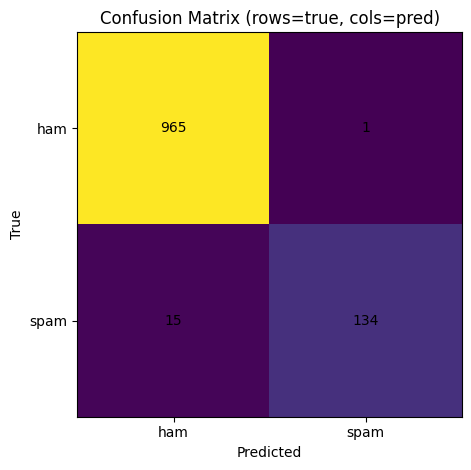

In [12]:
# Print classification report
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(cm)

# Labels and titles
ax.set_title("Confusion Matrix (rows=true, cols=pred)")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")

# Set ticks and labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["ham", "spam"])
ax.set_yticklabels(["ham", "spam"])

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha="center", va="center")

fig.tight_layout()
plt.show()


## Classification Report

This report shows precision, recall, and F1-score **per class**.


In [13]:
print(classification_report(y_true, y_pred, target_names=["ham", "spam"], zero_division=0))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Inference Demo

Below are a few example messages to demonstrate real-time predictions.


In [14]:
# Predict on custom samples
samples = [
    "Congrats! You've won a free prize. Click here to claim now!",
    "Hey, are we still meeting tomorrow at 10?",
    "URGENT: Your account has been compromised. Verify your password now.",
    "Can you send me the notes from class?",
    "Limited time offer! Buy now and save big!",
    "I'll call you later, I'm in class."
]

# Predict on sample texts
for t in samples:
    pred = int(model.predict([t])[0])  # 1=spam, 0=ham
    label = "SPAM" if pred == 1 else "HAM"
    print(f"[{label}] {t}")


[SPAM] Congrats! You've won a free prize. Click here to claim now!
[HAM] Hey, are we still meeting tomorrow at 10?
[SPAM] URGENT: Your account has been compromised. Verify your password now.
[HAM] Can you send me the notes from class?
[HAM] Limited time offer! Buy now and save big!
[HAM] I'll call you later, I'm in class.


## Key Takeaways — Classic NLP

- TF-IDF converts text into numeric vectors using a bag-of-words approach.
- Linear models (LinearSVC) perform extremely well on this dataset.
- High accuracy is common, but **spam recall** is the metric to watch.
- This pipeline represents a strong baseline before moving to:
  - Word embeddings
  - RNNs / CNNs
  - Transformers
